In [178]:
import feyn
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from datetime import datetime

DATA = 'data/'

In [179]:
df = pd.read_csv(DATA + 'churn.csv', sep=',', encoding='utf-8')
df.rename(columns={'Unnamed: 0': 'id'}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            36992 non-null  int64  
 1   age                           36992 non-null  int64  
 2   gender                        36992 non-null  object 
 3   security_no                   36992 non-null  object 
 4   region_category               31564 non-null  object 
 5   membership_category           36992 non-null  object 
 6   joining_date                  36992 non-null  object 
 7   joined_through_referral       36992 non-null  object 
 8   referral_id                   36992 non-null  object 
 9   preferred_offer_types         36704 non-null  object 
 10  medium_of_operation           36992 non-null  object 
 11  internet_option               36992 non-null  object 
 12  last_visit_time               36992 non-null  object 
 13  d

# Auto EDA

In [180]:
from pandas_profiling import ProfileReport
prof = ProfileReport(df)
prof.to_file(output_file='eda_output.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [181]:
prof.to_notebook_iframe()

# Manual EDA

## Missing values

In [182]:
df['gender'].replace('Unknown', np.nan, inplace=True)
df['joined_through_referral'].replace('?', np.nan, inplace=True)
df['referral_id'].replace('xxxxxxxx', np.nan, inplace=True)
df['medium_of_operation'].replace('?', np.nan, inplace=True)
# What does this mean actually?
df['avg_frequency_login_days'].replace('Error', np.nan, inplace=True)

## Percentage of missing values for each column

In [183]:
df.isna().sum() * 100 / len(df)

id                               0.000000
age                              0.000000
gender                           0.159494
security_no                      0.000000
region_category                 14.673443
membership_category              0.000000
joining_date                     0.000000
joined_through_referral         14.700476
referral_id                     48.242863
preferred_offer_types            0.778547
medium_of_operation             14.578828
internet_option                  0.000000
last_visit_time                  0.000000
days_since_last_login            0.000000
avg_time_spent                   0.000000
avg_transaction_value            0.000000
avg_frequency_login_days         9.520978
points_in_wallet                 9.307418
used_special_discount            0.000000
offer_application_preference     0.000000
past_complaint                   0.000000
complaint_status                 0.000000
feedback                         0.000000
churn_risk_score                 0

In [184]:
df.describe(percentiles=[0.05, 0.25, 0.50, 0.75, 0.95]).T

count          mean           std          min  \
id                     36992.0  18495.500000  10678.814916     0.000000   
age                    36992.0     37.118161     15.867412    10.000000   
days_since_last_login  36992.0    -41.915576    228.819900  -999.000000   
avg_time_spent         36992.0    243.472334    398.289149 -2814.109110   
avg_transaction_value  36992.0  29271.194003  19444.806226   800.460000   
points_in_wallet       33549.0    686.882199    194.063624  -760.661236   
churn_risk_score       36992.0      0.540982      0.498324     0.000000   

                                5%         25%        50%        75%  \
id                     1849.550000   9247.7500  18495.500  27743.250   
age                      12.000000     23.0000     37.000     51.000   
days_since_last_login  -999.000000      8.0000     12.000     16.000   
avg_time_spent           30.150000     60.1025    161.765    356.515   
avg_transaction_value  3468.966500  14177.5400  27554.485  40855.110   
points_in_wallet        330.752231    616.1500    697.620    763.950   
churn_risk_score          0.000000      0.0000      1.000      1.000   

                                95%           max  
id                     35141.450000  36991.000000  
age                       62.000000     64.000000  
days_since_last_login     22.000000     26.000000  
avg_time_spent          1031.076748   3235.578521  
avg_transaction_value  67338.889500  99914.050000  
points_in_wallet        1046.603480   2069.069761  
churn_risk_score           1.000000      1.000000

In [185]:
## Hay que hacer un par de plots?

## Pearson's correlation

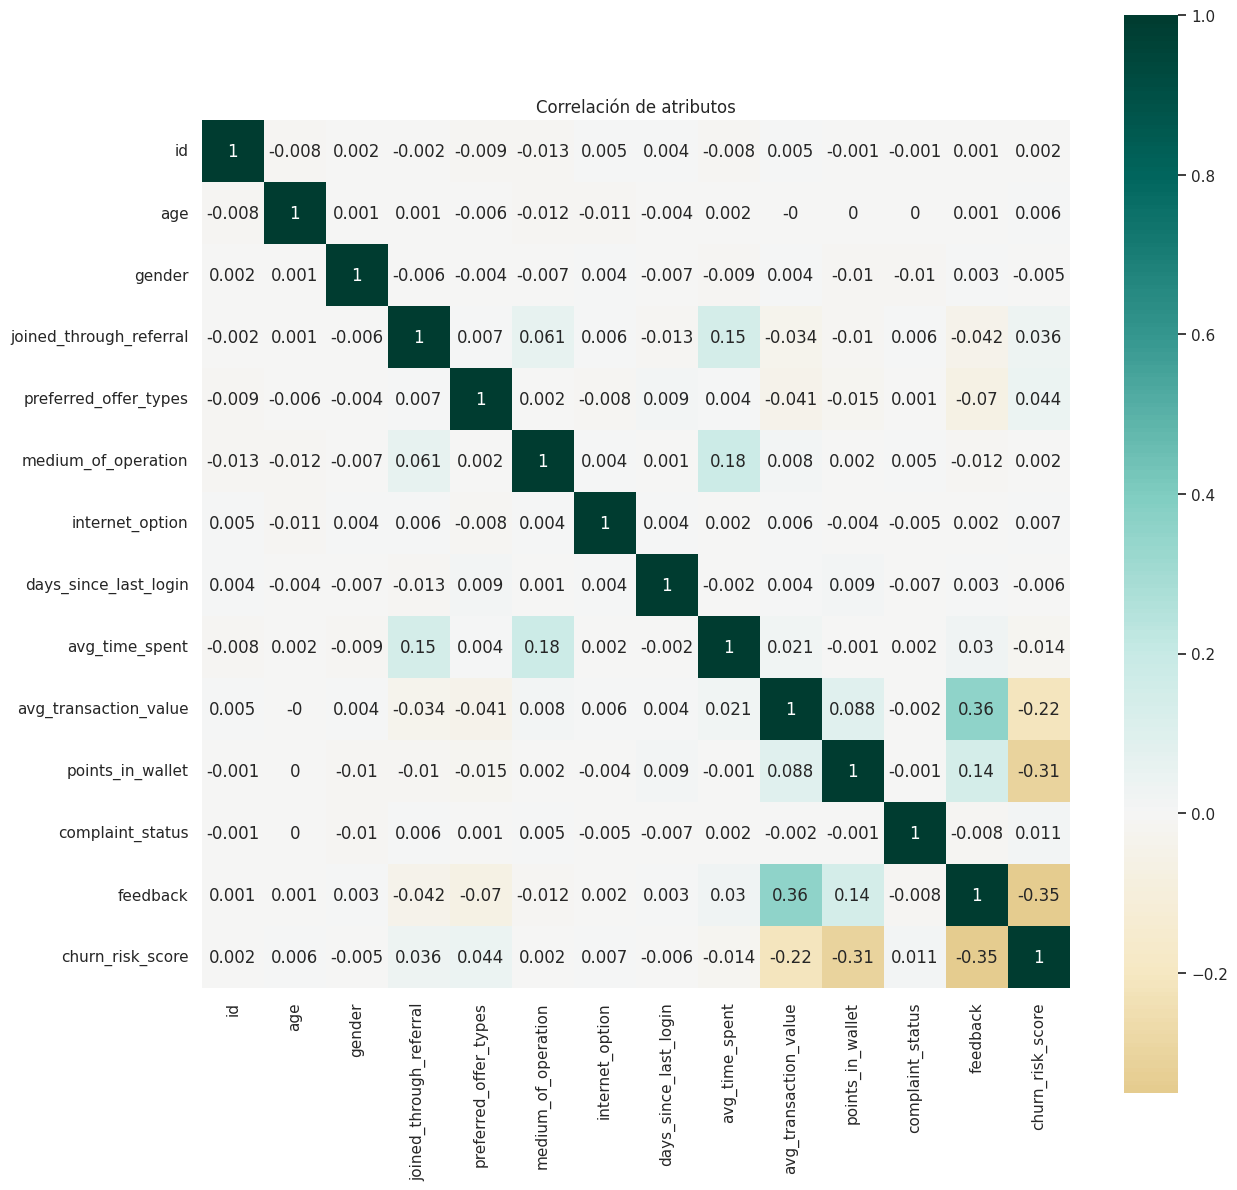

In [186]:
def generate_map_from_keys(keys):
    return {k: i for i, k in enumerate(keys)}

corr_df = df.copy()
corr_df['gender'].replace(generate_map_from_keys(['F','M']), inplace = True)
corr_df['region_category'].replace(generate_map_from_keys(['City','Town']), inplace = True)
corr_df['membership_category'].replace(
    generate_map_from_keys(
        ['Basic Membership','No Membership', 'Gold Membership', 'Silver Membership','Premium Membership']
    ), 
    inplace = True
)
corr_df['joined_through_referral'].replace(generate_map_from_keys(['No','Yes']), inplace = True)
corr_df['preferred_offer_types'].replace(
    generate_map_from_keys(
        ['Gift Vouchers/Coupons','Credit/Debit Card Offers', 'Without Offers']
    ),
    inplace = True
)
corr_df['medium_of_operation'].replace(
    generate_map_from_keys(
        ['Desktop','Smartphone', 'Both']
    ),
    inplace = True
)
corr_df['internet_option'].replace(
    generate_map_from_keys(
        ['Wi-Fi','Mobile_Data', 'Fiber_Optic']
    ),
    inplace = True
)
corr_df['joined_through_referral'].replace(generate_map_from_keys(['No','Yes']), inplace = True)
corr_df['joined_through_referral'].replace(generate_map_from_keys(['No','Yes']), inplace = True)
corr_df['joined_through_referral'].replace(generate_map_from_keys(['No','Yes']), inplace = True)
corr_df['complaint_status'].replace(
    generate_map_from_keys(
        ['Not Applicable', 'Unsolved', 'Solved', 'Solved in Follow-up','No Information Available']
    ), 
    inplace = True
)
corr_df['feedback'].replace(
    generate_map_from_keys(
        ['Poor Product Quality', 'No reason specified', 'Too many ads', 'Poor Website', 
         'Poor Customer Service', 'Reasonable Price', 'User Friendly Website', 'Products always in Stock',
         'Quality Customer Care']
    ), 
    inplace = True
)

plt.subplots(figsize=(14, 14))
sns_plot = sns.heatmap(corr_df.corr(method = 'pearson').round(decimals = 3), annot = True, cmap="BrBG", center = 0.0, square = True)
sns_plot.set_title('Correlación de atributos')
sns_plot.get_figure().savefig("correlacion_pearson.png")

La matriz de correlación de Pearson sugiere que hay más correlación entre el riesgo de abandono del cliente y los campos:

    - feedback
    - points_in_wallet
    - avg_transaction_value
    
Asimismo, el campo _feedback_ tiene una correlación relativa con el valor promedio de transacciones (*avg_ transaction_value*) y con el campo *points_in_wallet*.

Por último, el campo *avg_time_spent* tiene cierta correlación con los campos *joined_through_referral* y *medium_of_operation*

<AxesSubplot:title={'center':'Correlación de atributos con la tasa de abandono del cliente'}>

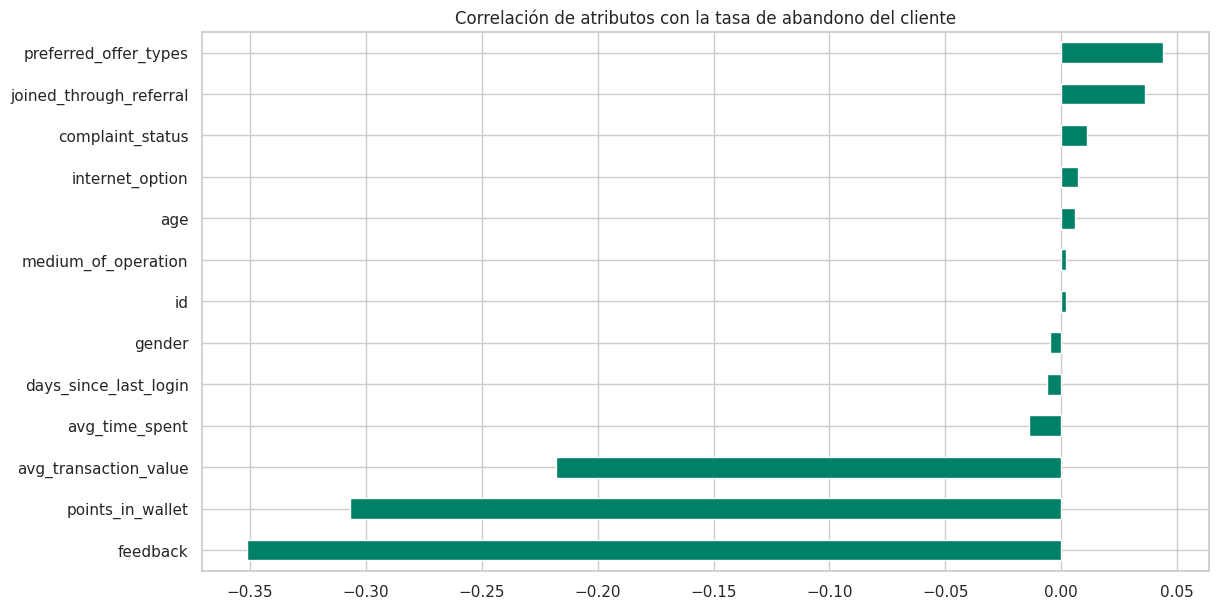

In [187]:
sns.set(rc={'figure.figsize':(13, 7)}, style = "whitegrid")
corr_df.corr(method = 'pearson')['churn_risk_score'].drop(['churn_risk_score']).round(decimals = 3).sort_values().plot(kind = 'barh', grid = True, colormap = 'summer', title = 'Correlación de atributos con la tasa de abandono del cliente')

## Data Cleaning
Vamos a realizar una limpieza campo por campo, donde corresponda

### gender

Hay un 0,15% de valores nulos. Vamos a completarlos usando la moda

In [188]:
df['gender'].fillna(df['gender'].mode()[0], inplace = True)
df['gender'].value_counts()

F    18549
M    18443
Name: gender, dtype: int64

### security_no

Se trata de un id único, así que vamos a prescindir de él

In [189]:
df.drop(columns=['security_no'], inplace=True)

### region_category

Tiene alrededor de un 15% de atributos faltantes, así que vamos a generar una nueva categoría "Unknown" porque podemos llegar a ensuciar la estructura de los datos si nos inclinamos por inferirlo

In [190]:
df['region_category'].fillna('Unknown', inplace = True)
df['region_category'].value_counts()

Town       14128
City       12737
Unknown     5428
Village     4699
Name: region_category, dtype: int64

### joined_through_referral

Análogamente, vamos a completar usando una nueva categoría Unknown porque tenemos un 15% de atributos faltantes.

In [191]:
df['joined_through_referral'].fillna('Unknown', inplace = True)
df['joined_through_referral'].value_counts()

No         15839
Yes        15715
Unknown     5438
Name: joined_through_referral, dtype: int64

### referral_id

No nos interesa el dato y está excedido de valores desconocidos. Prescindiremos del atributo

In [192]:
df.drop(columns=['referral_id'], inplace=True)

### preferred_offer_types

Hay un 0,8% de valores nulos. Vamos a completarlos usando la moda

In [193]:
df['preferred_offer_types'].fillna(df['preferred_offer_types'].mode()[0], inplace = True)
df['preferred_offer_types'].value_counts()

Gift Vouchers/Coupons       12637
Credit/Debit Card Offers    12274
Without Offers              12081
Name: preferred_offer_types, dtype: int64

### medium_of_operation

Una vez más vamos a completar usando una nueva categoría Unknown porque tenemos casi un 15% de atributos faltantes.

In [194]:
df['medium_of_operation'].fillna('Unknown', inplace = True)
df['medium_of_operation'].value_counts()

Desktop       13913
Smartphone    13876
Unknown        5393
Both           3810
Name: medium_of_operation, dtype: int64

### days_since_last_login
Podemos ver en este caso que hay valores erráticos: aquellos que son negativos.
Podemos ver en el Profiling Report de pandas que son 5.4%
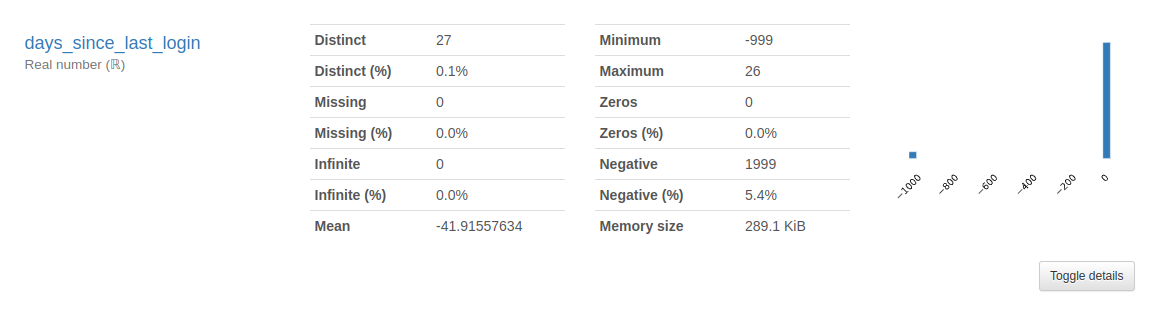

In [195]:
df['days_since_last_login'].describe()

count    36992.000000
mean       -41.915576
std        228.819900
min       -999.000000
25%          8.000000
50%         12.000000
75%         16.000000
max         26.000000
Name: days_since_last_login, dtype: float64

A este 5,4% vamos a normalizarlo reemplazándolo por la media contando únicamente los valores que NO son negativos

In [196]:
positive_mean = df[df['days_since_last_login'] >= 0]['days_since_last_login'].mean()
print(f"La media es {positive_mean}")
df['days_since_last_login'] = df['days_since_last_login'].apply(lambda x: x if x >= 0 else positive_mean)
df['days_since_last_login'].describe()

La media es 12.758551710342068


count    36992.000000
mean        12.758552
std          5.419937
min          1.000000
25%          9.000000
50%         12.758552
75%         16.000000
max         26.000000
Name: days_since_last_login, dtype: float64

### avg_time_spent
Pasa algo análogo al campo anterior, con el 4.6% de las entradas. Vamos a resolver entonces análogamente

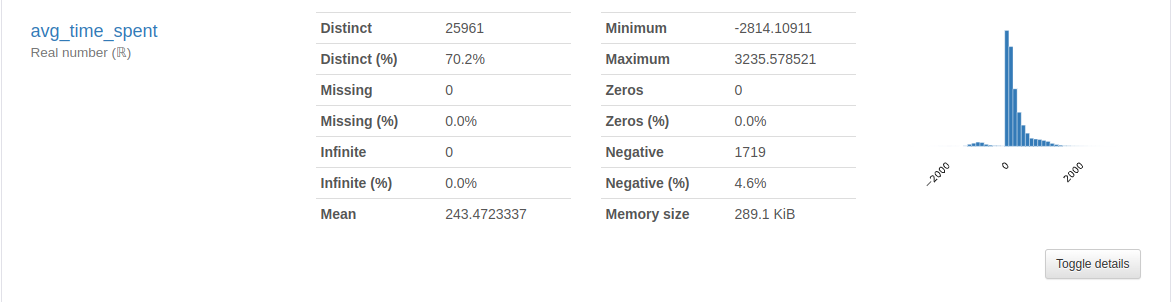

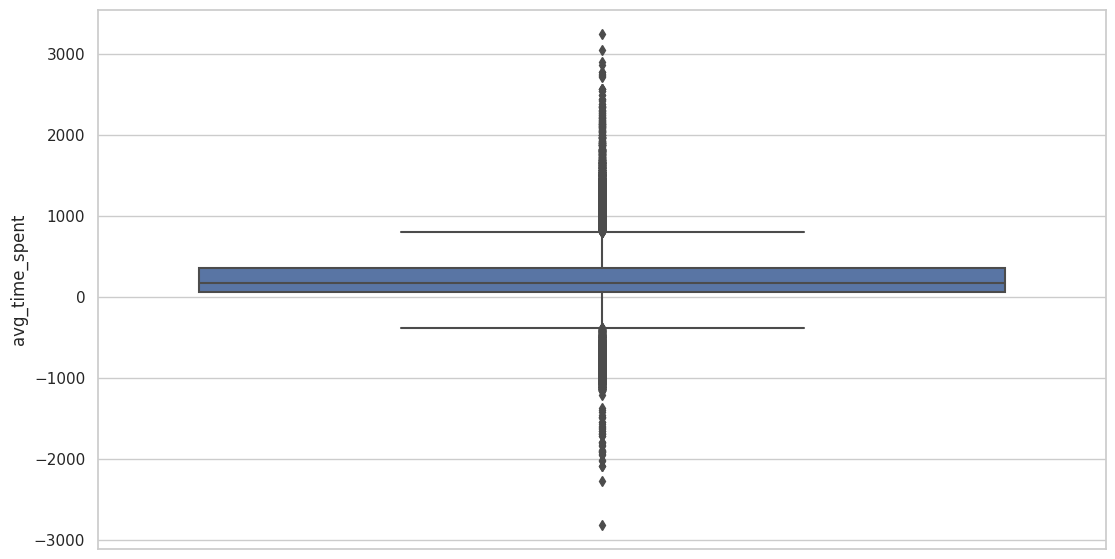

In [197]:
sns.boxplot(y=df['avg_time_spent'])
plt.show()

In [198]:
positive_mean = df[df['avg_time_spent'] >= 0]['avg_time_spent'].mean()
print(f"La media es {positive_mean}")
df['avg_time_spent'] = df['avg_time_spent'].apply(lambda x: x if x >= 0 else positive_mean)
df['avg_time_spent'].describe()

La media es 292.7514658920185


count    36992.000000
mean       292.751466
std        324.141731
min          1.837399
25%         75.620000
50%        186.845000
75%        356.515000
max       3235.578521
Name: avg_time_spent, dtype: float64

## avg_frequency_login_days

In [199]:
df['avg_frequency_login_days'] = df['avg_frequency_login_days'].astype(float)
positive_mean = df[df['avg_frequency_login_days'] >= 0]['avg_frequency_login_days'].mean()
print(f"La media es {positive_mean}")

df['avg_frequency_login_days'] = df['avg_frequency_login_days'].apply(lambda x: x if x >= 0 else positive_mean)
df['avg_frequency_login_days'].describe()

La media es 16.538614635607185


count    36992.000000
mean        16.538615
std          7.892782
min          0.009208
25%         11.000000
50%         16.538615
75%         22.000000
max         73.061995
Name: avg_frequency_login_days, dtype: float64

### points_in_wallet
Tiene un total de 9,3% de valores nulos y un 0,4% de valores negativos. Es por esto que vamos a considerar que dichos valores negativos son outliers y vamos a limpiarlos

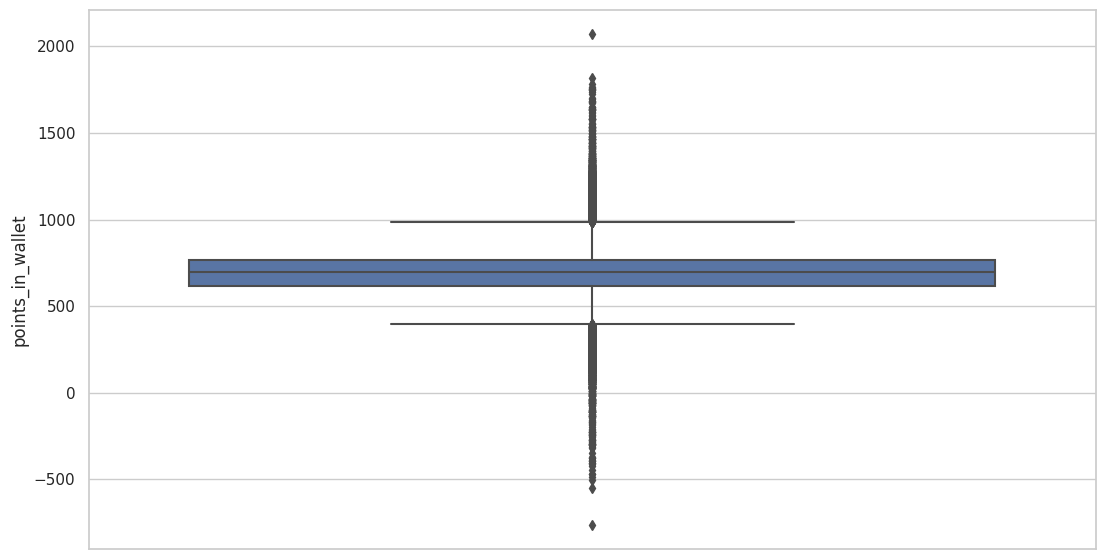

In [200]:
sns.boxplot(y=df['points_in_wallet'])
plt.show()

Además, vemos un valor por encima del umbral de 2000, que también consideraremos outlier

In [201]:
# df['points_in_wallet'] = df['points_in_wallet'].astype(float)
positive_mean = df[(df['points_in_wallet'] >= 0) & (df['points_in_wallet'] < 2000)]['points_in_wallet'].mean()
print(f"La media es {positive_mean}")

La media es 690.3134204814429


In [202]:
df['points_in_wallet'] = df['points_in_wallet'].apply(lambda x: x if (x >= 0) and (x < 2000) else positive_mean)
df['points_in_wallet'].describe()

count    36992.000000
mean       690.313420
std        177.033800
min          6.432208
25%        625.597500
50%        690.313420
75%        756.992500
max       1816.933696
Name: points_in_wallet, dtype: float64

## Feature engineering

### age

Vamos a generar 4 rangos para el atributo edad

In [203]:
df['age'] = pd.cut(df['age'], 4, labels=['10-23', '24-37', '38-50', '51-64'])
df['age'].value_counts()

51-64    9488
24-37    9410
10-23    9322
38-50    8772
Name: age, dtype: int64

### joining_date

In [204]:
df['joining_date'] = pd.to_datetime(df['joining_date'], format='%Y-%m-%d')
min_date = min(df['joining_date'])
max_date = max(df['joining_date'])
print(f"From {min_date} to {max_date}")

From 2015-01-01 00:00:00 to 2017-12-31 00:00:00


Como vemos, los usuarios en estudio son aquellos que se unieron a la plataforma entre el 1° de enero del año 2015.

Vamos a generar una columna 'joining_semester' que comprenda los números del 0 al 5

In [205]:
def transform_date_into_semester(x):
    if x <= datetime(2015, 6, 30):
        return 0
    elif x <= datetime(2015, 12, 31):
        return 1
    elif x <= datetime(2016, 6, 30):
        return 2
    elif x <= datetime(2016, 12, 31):
        return 3
    elif x <= datetime(2017, 6, 30):
        return 4
    elif x <= datetime(2017, 12, 31):
        return 5
    else:
        print(f'date is {x}')
        raise NotImplementedError

df['joining_semester'] = df['joining_date'].apply(transform_date_into_semester)
df['joining_semester'].value_counts()

5    6393
1    6202
4    6147
3    6111
0    6095
2    6044
Name: joining_semester, dtype: int64

### last_visit_time

In [206]:
# df['last_visit_time'] = df['last_visit_time'].apply(lambda: x.strftime(format='%H:%M:%S'))
df['last_visit_time'] = pd.to_datetime(df['last_visit_time'], format='%H:%M:%S')
min_time = min(df['last_visit_time'])
max_time = max(df['last_visit_time'])
print(f"From {min_time} to {max_time}")

From 1900-01-01 00:00:00 to 1900-01-01 23:59:59


Con el horario de la última visita voy a generar 3 rangos horarios: madrugada, día, noche.

In [207]:
def transform_time_into_period(x):
    if x < datetime(1900, 1, 1, 8):
        return 'morning'
    if x < datetime(1900, 1, 1, 16):
        return 'day'
    else:
        return 'noon'

df['last_time_period'] = df['last_visit_time'].apply(transform_time_into_period)
df['last_time_period'].value_counts()

noon       12415
day        12364
morning    12213
Name: last_time_period, dtype: int64

### days_since_last_login
Para este campo ya resolvimos qué hacer con los valores inválidos. Ahora vamos a transformar el campo en uno categórico: 

In [208]:
def transform_days_into_bucket(x):
    if x < 4:
        return 0
    if x < 10:
        return 1
    else:
        return 2

df['days_since_last_login'] = df['days_since_last_login'].apply(transform_days_into_bucket)
df['days_since_last_login'].value_counts()

2    26834
1     8365
0     1793
Name: days_since_last_login, dtype: int64

A este 5,4% vamos a normalizarlo reemplazándolo por la media contando únicamente los valores que NO son negativos

In [209]:
positive_mean = df[df['days_since_last_login'] >= 0]['days_since_last_login'].mean()
print(f"La media es {positive_mean}")
df['days_since_last_login'] = df['days_since_last_login'].apply(lambda x: x if x >= 0 else positive_mean)
df['days_since_last_login'].describe()

La media es 1.6769301470588236


count    36992.000000
mean         1.676930
std          0.561822
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          2.000000
Name: days_since_last_login, dtype: float64

### avg_time_spent

In [210]:
def transform_time_into_bucket(x):
    # 10 minutes
    if x < 600:
        return "less than 10'"
    # 
    if x < 1800:
        return "less than 30'"
    else:
        return "more than 30'"

df['avg_time_spent'] = df['avg_time_spent'].apply(transform_time_into_bucket)
df['avg_time_spent'].value_counts()

less than 10'    32317
less than 30'     4537
more than 30'      138
Name: avg_time_spent, dtype: int64

### avg_transaction_value
Vamos a transformarlo en 3 variables categóricas

In [211]:
df['avg_transaction_value'] = pd.cut(df['avg_transaction_value'], 3, labels=[str(i) for i in range(3)])
df['avg_transaction_value'].value_counts()

0    22897
1    12215
2     1880
Name: avg_transaction_value, dtype: int64

## avg_frequency_login_days
Vamos a separarlo también en 3 variables categóricas

In [212]:
df['avg_frequency_login_days'] = pd.cut(df['avg_frequency_login_days'], 3, labels=[str(i) for i in range(3)])
df['avg_frequency_login_days'].value_counts()

0    30701
1     6157
2      134
Name: avg_frequency_login_days, dtype: int64

### points_in_wallet
Vamos a generar 3 categorías

In [213]:
df['points_in_wallet'] = pd.cut(df['points_in_wallet'], 3, labels=['low', 'medium', 'high'])
df['points_in_wallet'].value_counts()

medium    28881
low        7607
high        504
Name: points_in_wallet, dtype: int64

### past_complaint and complaint_status
En este caso vamos a utilizar los dos campos para generar una única variable.

In [214]:
df.apply(lambda r: str(r['past_complaint']) + "-" + r['complaint_status'], axis=1).value_counts()

No-Not Applicable               18602
Yes-Unsolved                     4644
Yes-Solved                       4619
Yes-Solved in Follow-up          4577
Yes-No Information Available     4550
dtype: int64

In [215]:
def combine_complaint_and_status(had_complaint, complaint_status):
    if not had_complaint:
        return 0
    # had_complaint
    if complaint_status == 'Solved':
        return 1
    elif complaint_status == 'Solved in Follow-up':
        return 2
    elif complaint_status == 'Unsolved':
        return 3
    else:
        # 'No Information Available'
        return 4

df['past_complaint_status'] = df.apply(lambda r: 
    combine_complaint_and_status(
        r['past_complaint'],
        r['complaint_status']
    ),
    axis=1
)
df['past_complaint_status'].value_counts()

4    23152
3     4644
1     4619
2     4577
Name: past_complaint_status, dtype: int64

In [216]:
df.drop(columns=['past_complaint', 'complaint_status', 'id'], inplace=True)

In [217]:
## Mejoras: PCA sobre los campos que NO tienen alta correlación con churn_risk_score

# Dataset split

In [218]:
# For the first execution we will create them and comment this
train, test = feyn.tools.split(df, ratio=(8,2), random_state=101)
train.to_csv(DATA + 'train_churn.csv', sep=',', encoding='utf-8', index=False)
test.to_csv(DATA + 'test_churn.csv', sep=',', encoding='utf-8', index=False)

In [219]:
print(f"Dataset de entrenamiento tiene un shape de {train.shape}. {(len(train)/len(df)):.2%}% del dataset")
print(f"Dataset de prueba tiene un shape de {test.shape}. {(len(test)/len(df)):.2%}% del dataset")

Dataset de entrenamiento tiene un shape de (29594, 22). 80.00%% del dataset
Dataset de prueba tiene un shape de (7398, 22). 20.00%% del dataset
